In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, lsim, cont2discrete

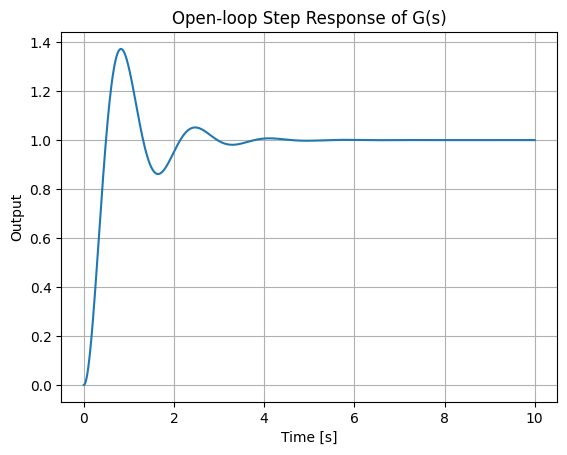

In [ ]:
# open loop second-order system
wn = 4
zeta = 0.3
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
G = TransferFunction(num, den)
t = np.linspace(0, 10, 1000)
t_out, y_out = step(G, T=t)
plt.figure()
plt.plot(t_out, y_out)
plt.title('Open-loop Step Response of G(s)')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.grid(True)
plt.show()

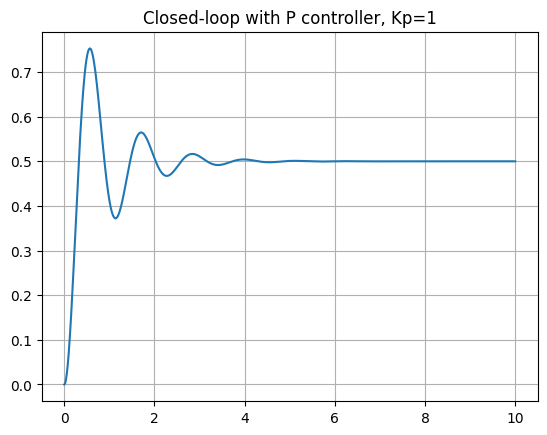

In [ ]:
#P Controller and Closed-Loop System
Kp = 1
C_p = TransferFunction([Kp], [1])
def closed_loop(G, C):
    num_cl = np.polymul(G.num, C.num)
    den_cl = np.polyadd(np.polymul(G.den, C.num), np.polymul(G.num, C.den))
    return TransferFunction(num_cl, den_cl)
CL_p = closed_loop(G, C_p)
t_out, y_out = step(CL_p, T=t)
plt.figure()
plt.plot(t_out, y_out)
plt.title(f'Closed-loop with P controller, Kp={Kp}')
plt.grid(True)
plt.show()

In [ ]:
#PI and PID Controllers
Kp, Ki = 1, 2
C_pi = TransferFunction([Kp, Ki], [1, 0])
Kp, Ki, Kd = 1, 2, 0.5
C_pid = TransferFunction([Kd, Kp, Ki], [1, 0])
CL_pi = closed_loop(G, C_pi)
CL_pid = closed_loop(G, C_pid)
t_out, y_p = step(CL_p, T=t)
_, y_pi = step(CL_pi, T=t)
_, y_pid = step(CL_pid, T=t)
plt.figure()
plt.plot(t_out, y_p, label='P')
plt.plot(t_out, y_pi, label='PI')
plt.plot(t_out, y_pid, label='PID')
plt.title('P vs PI vs PID Controllers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Disturbance Rejection
d = 0.5 * (t > 2)
def sensitivity(G, C):
    num_s = G.den
    den_s = np.polyadd(G.den, np.polymul(G.num, C.num))
    return TransferFunction(num_s, den_s)
S_pid = sensitivity(G, C_pid)
_, y_d, _ = lsim(S_pid, d, t)
plt.figure()
plt.plot(t, y_d, label='Disturbance response')
plt.legend()
plt.title('Disturbance Rejection (PID)')
plt.grid(True)
plt.show()